# MMC - Laboratorium 1 - Bartosz Sosik (310287)

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Zadanie 1
### Klasa Z1_Generator
Klasa opisująca liniowy generator kongruentny. W chwili inicjalizacji specyfikujemy jego parametry: a, m oraz c. \
Liczby generowane są zgodnie z zależnością: $X_{n}=(aX_{n-1} + c)$ $mod$ $m$.
Dla $c=0$ mamy generator multiplikatywny. Takie uproszczenie moze mieć sens, gdy wartość początkowa $X_0$ (*seed*) jest niezerowa. Jeśli $seed=0$, generowanoby ciągle liczbę 0.
 - Metoda *generate* pozwala na wygenerowanie zadanej ilości liczb, zaczynając od podanej wartości $X_0$ nazwanej *seed*.
 - Metoda *plot* tworzy wykres przedstawiający każdą wygenerowaną liczbę w funkcji liczby poprzedniej, lub przesuniętej o *step* jednostek do tyłu.

In [2]:
class Z1_Generator:
    def __init__(self, a, m, c=0):
        self.a = a
        self.m = m
        self.c = c
        self.is_generated = False
        self.generated = None

    def generate(self, seed, count):
        # Initialization
        self.generated = list()
        prev = seed
        # Generation
        for i in range(count):
            next = (self.a * prev + self.c) % self.m
            self.generated.append(next)
            prev = next
        self.is_generated = True
        print("Generated successfully!")

    def plot(self, step=1):
        if not self.is_generated:
            print('You need to generate numbers first!')
            return
        plt.figure()
        plt.plot(self.generated[:-step:], self.generated[step:], 'ro')
        plt.xlabel('xn')
        plt.title(f'Wykres rozproszenia, a={self.a}, krok={step}')
        plt.ylabel(f'xn_{step}')

### Generator 1:
- $a=17$
- $m=2^{13}-1$
- $c=0$

Za jego pomocą wygenerowano 2500 liczb, a następnie narysowano wykresy:
- $(x_n, x_{n+1})$ - wykres przedstawiający każdą wygenerowaną liczbę w funkcji liczby poprzedniej (struktura przestrzenna z krokiem równym 1)
- $(x_n, x_{n+2})$ - struktura przestrzenna z krokiem równym 2

Generated successfully!


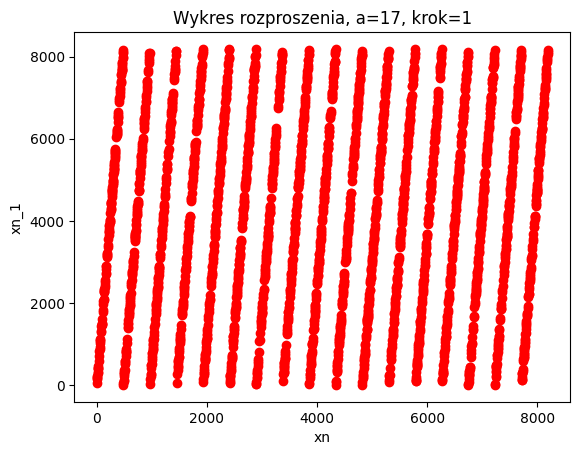

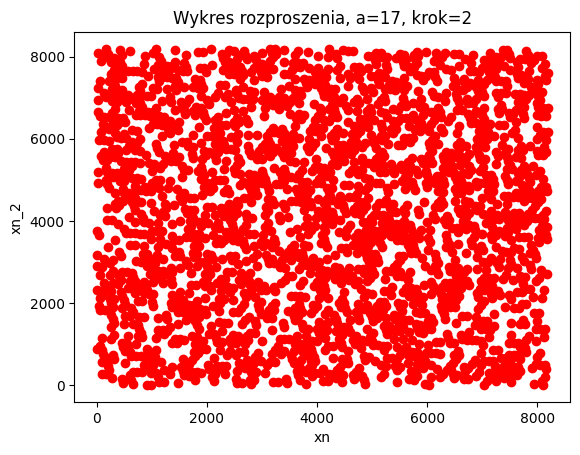

In [3]:
gen_17 = Z1_Generator(a=17, m=(pow(2, 13)-1))
gen_17.generate(1, 2500)
gen_17.plot(step=1)
gen_17.plot(step=2)

### Generator 2:
- $a=85$
- $m=2^{13}-1$
- $c=0$

Wykonano takie same kroki jak dla generatora 1.

Generated successfully!


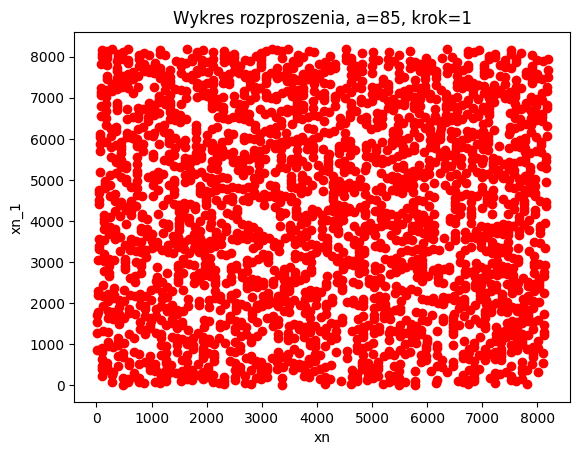

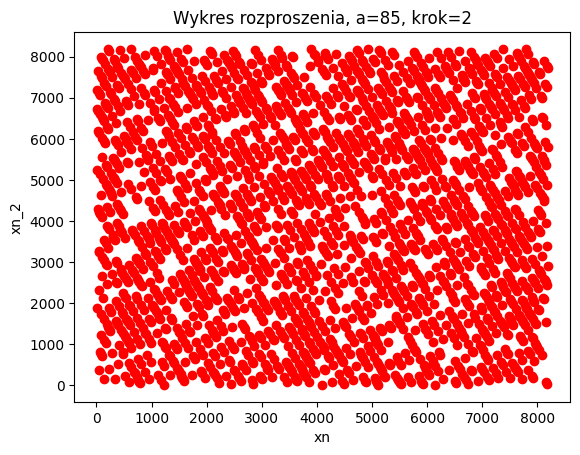

In [4]:
gen_85 = Z1_Generator(a=85, m=(pow(2, 13)-1))
gen_85.generate(1, 2500)
gen_85.plot(step=1)
gen_85.plot(step=2)

### Obserwacje
3. Analizując wykresy przedstawiające strukture przestrzenną generatora dla kroku równego 1 możemy zobaczyć, że lepszą wartością mnożnika jest $a=85$. Każdy punkt na wykresie reprezentuje parę kolejnych liczb wygenerowanych przez generator. Idealnie losowy generator powinien generować punkty, które sa równomiernie rozłożone na całym wykresie, bez żadnych wzorców, skupisk i linii. Na wykresie dla $a=17$ wzorzec (tworzące sie linie) jest bardzo wyraźny i widoczny gołym okiem. Oznacza to, że ten generator nie jest "wystarczająco" losowy - istnieje mocna korelacja między kolejnymi generowanymi liczbami. O ile dla $a=85$ również możemy doszukać się pewnych tendencji, to manifestują się znacznie mniej.
4. Analizując wykresy dla kroku równego 2, można zaobserwować sytuację odwrotną. Dla $a=17$ pokryty jest cały obszar wykresu i ciężko jest zaobserowoać jakieś wzorce, tendencje. Z kolei dla $a=85$, punkty tworzą linie proste. Oznacza to, że pomiędzy punktami generowanymi w chwili n, a punktami generowanymi w chwili n+2 istnieje silna zależność. Obecny punkt ma silny wpływ na punkt wygenerowany za dwa kroki.    

# Zadanie 3
Zadanie 3 zaimplementowane zostało w języku C++ (plik *Z3.cpp*). Stworzono tam 6 generatorów liczb losowych z wykorzystaniem biblioteki random. Każdy generator inicjalizowany jest ziarnem, a następnie użyty do wygenerowania 10 milionów liczb z rozkładu jednostajnego na przedziale [0;10). Dla każdego generatora zmierzony został czas generowania liczb. Uzyskane wyniki zapisywane są do pliku tekstowego *Z3_times.txt*. Na ich podstawie w poniższym notatniku tworzony jest wykres słupkowy porównujący czasy działania generatorów.

In [12]:
generators = [
    "Minstd_rand", "Mt19937", "Mt19937_64",
    "Ranlux48_base", "Ranlux48", "Knuth_b"
]
f = open('Z3_times.txt', 'r')
times = [int(line.strip()) for line in f.readlines()]
times

[600, 755, 605, 648, 9588, 751]

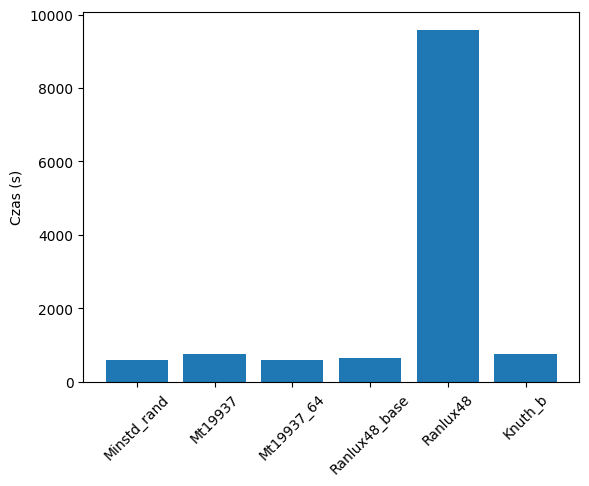

In [13]:
plt.bar(generators, times)
plt.xticks(rotation=45)
plt.ylabel('Czas (s)')
plt.show()

Możemy zaobserwować, że zdecydowanie najwięcej czasu potrzebował generator Ranlux48, któremu zadanie zajęło aż 9,588 sekund. Pomiędzy pozostałymi generatorami nie ma drastycznych róznic. Najmniej czasu potrzebował Minstd_rand (0,6s), a zaraz za nim Mt_19937_64 (0,605s).